# Plot Northern Hemisphere Sea Ice Area

## Introduction
Northern hemisphere total sea ice area are plotted.  These data are from historical and SSP5-8.5 _siarean_ files.

## Data
Data are downloaded from from `esfg-node.llnl.gov`.  The archive can be searched and files downloaded using the ESGF Search RESTful API.  Search strings can be entered into a browser as a URL or performed using the `python` `requests` module.

An example search for `project=CMIP6`, `variable_id=siarean`, `table_id=SImon`, `experiment_id=historical`, and `member_id=r1i1p1f1` (the first ensemble member) looks like.



A `wget` script can be generated and downloaded by copy and pasting the following URL into a browser. 

https://esgf-node.llnl.gov/esg-search/wget?limit=500&project=CMIP6&variable_id=siarean&table_id=SImon&experiment_id=historical&member_id=r1i1p1f1

This automatically downloads a `wget` script.  See https://www.earthsystemcog.org/projects/cog/doc/wget for further details.

You will need an ESGF login and OpenID to get the data.  This is easily set up.

Data has been processed as described in `process_and_plot_siextentn.ipynb`.  Complete data are in `siarean.SImon.CMIP6.historical.csv` and `siarean.SImon.CMIP6.ssp585.csv`.

In [21]:
import os
import itertools
import calendar

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import pandas as pd

In [3]:
DATADIR = '/home/apbarret/Data/CMIP6'

In [5]:
historical_df = pd.read_csv(os.path.join(DATADIR, 'siarean', 'SImon', 'siarean.SImon.CMIP6.historical.csv'),
                           index_col=0, header=0, parse_dates=True)
historical_df.head()

,MPI-ESM1-2-HR,ACCESS-CM2,INM-CM4-8,CESM2-WACCM-FV2,MPI-ESM-1-2-HAM,CESM2-WACCM,ACCESS-ESM1-5,MRI-ESM2-0,AWI-CM-1-1-MR,CESM2-FV2,CESM2,MPI-ESM1-2-LR,NorESM2-LM,NorESM2-MM,IPSL-CM6A-LR
1850-01-15,13.486614,14.360470,14.586742,14.210920,12.754804,13.688188,13.457931,13.860890,14.378301,13.760965,13.547087,14.059256,14.144804,14.193403,15.397087
1850-02-15,13.758346,15.281556,15.705677,14.715774,13.471666,14.102425,14.722664,14.934191,15.574938,14.209129,14.335664,15.005720,14.478759,14.802825,16.789690
1850-03-15,14.195837,15.843057,15.949246,14.646940,13.721946,14.379153,15.128111,15.169263,15.451425,14.611517,14.726431,15.275677,14.366574,14.861143,16.678750
1850-04-15,13.600492,15.233775,15.219355,14.509631,13.034924,14.256236,14.531690,14.281004,14.804174,14.280624,14.247328,14.256274,13.946235,14.089251,15.664986
1850-05-15,12.170599,13.534682,13.469323,13.103409,11.743914,12.801426,12.930463,12.515518,12.959340,12.839067,12.705245,12.165003,12.318433,12.506202,13.053457


In [9]:
scenario_df = pd.read_csv(os.path.join(DATADIR, 'siarean', 'SImon', 'siarean.SImon.CMIP6.ssp585.csv'),
                          index_col=0, header=0, parse_dates=True)
scenario_df.head()

,ACCESS-CM2,INM-CM4-8,CESM2-WACCM,ACCESS-ESM1-5,MRI-ESM2-0,CESM2,MPI-ESM1-2-LR,INM-CM5-0,NorESM2-MM,IPSL-CM6A-LR
2015-01-15,13.184459,14.120277,12.708991,11.617716,12.117385,12.839273,12.069800,13.142847,13.295839,12.891386
2015-02-15,14.467339,15.093279,13.574465,12.834422,12.975230,13.411846,12.908060,14.051191,14.001905,14.227772
2015-03-15,14.593975,15.861762,13.840609,13.271381,13.174067,13.637826,12.983154,14.257176,14.111730,14.491024
2015-04-15,14.407735,15.609098,13.521174,12.933763,12.636848,13.262925,12.314303,13.064627,13.312252,13.737044
2015-05-15,13.022176,13.693647,11.950948,11.332259,10.973166,11.481054,10.838826,11.127853,11.701068,11.401874


In [10]:
joint_df = pd.concat([historical_df, scenario_df])
joint_df

,MPI-ESM1-2-HR,ACCESS-CM2,INM-CM4-8,CESM2-WACCM-FV2,MPI-ESM-1-2-HAM,CESM2-WACCM,ACCESS-ESM1-5,MRI-ESM2-0,AWI-CM-1-1-MR,CESM2-FV2,CESM2,MPI-ESM1-2-LR,NorESM2-LM,NorESM2-MM,IPSL-CM6A-LR,INM-CM5-0
1850-01-15,13.486614,14.360470,14.586742,14.210920,12.754804,13.688188,13.457931,13.860890,14.378301,13.760965,13.547087,14.059256,14.144804,14.193403,15.397087,NaN
1850-02-15,13.758346,15.281556,15.705677,14.715774,13.471666,14.102425,14.722664,14.934191,15.574938,14.209129,14.335664,15.005720,14.478759,14.802825,16.789690,NaN
1850-03-15,14.195837,15.843057,15.949246,14.646940,13.721946,14.379153,15.128111,15.169263,15.451425,14.611517,14.726431,15.275677,14.366574,14.861143,16.678750,NaN
1850-04-15,13.600492,15.233775,15.219355,14.509631,13.034924,14.256236,14.531690,14.281004,14.804174,14.280624,14.247328,14.256274,13.946235,14.089251,15.664986,NaN
1850-05-15,12.170599,13.534682,13.469323,13.103409,11.743914,12.801426,12.930463,12.515518,12.959340,12.839067,12.705245,12.165003,12.318433,12.506202,13.053457,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2100-08-15,NaN,0.000787,3.043281,NaN,NaN,0.000039,0.022362,0.003452,NaN,NaN,0.000027,0.000000,NaN,0.135319,0.000000,1.012919
2100-09-15,NaN,0.000066,2.822231,NaN,NaN,0.000000,0.004635,0.005483,NaN,NaN,0.000000,0.000000,NaN,0.076914,0.000000,0.402365
2100-10-15,NaN,0.000287,3.564845,NaN,NaN,0.000000,0.001016,0.006352,NaN,NaN,0.000000,0.000092,NaN,0.378288,0.000000,0.953286
2100-11-15,NaN,0.017393,5.513241,NaN,NaN,0.000000,0.001873,0.007299,NaN,NaN,0.000000,0.216590,NaN,1.326202,0.000119,2.955572


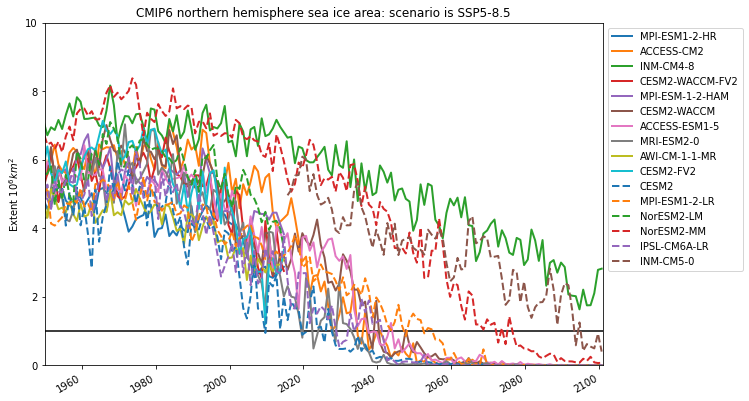

In [19]:
# Make color and symbols for models
it = itertools.product(['-', '--'], mcolors.TABLEAU_COLORS)
style, color = zip(*[next(it) for i in range(joint_df.shape[1])])

fig, ax = plt.subplots(figsize=(10, 7))
joint_df[joint_df.index.month == 9].plot(ax = ax, linewidth=2, style=list(style), color=list(color))
ax.set_ylim(0, 10)
ax.set_xlim('1950-01-01', '2100-12-31');
ax.set_title("CMIP6 northern hemisphere sea ice area: scenario is SSP5-8.5")
ax.set_ylabel("Extent $10^6 km^2$");
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
ax.axhline(1., c='k', zorder=1)
fig.savefig(os.path.join(DATADIR, 'siextentn', 'SImon', 'siarean.SImon.CMIP6.historical_and_ssp585.png'))

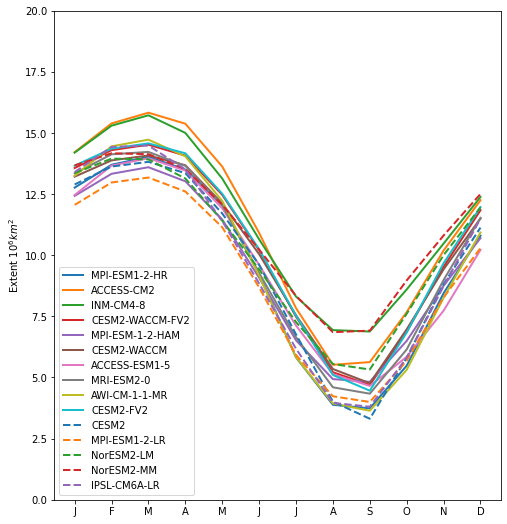

In [22]:
dfClim = historical_df['1979':'2014'].groupby(historical_df['1979':'2014'].index.month).mean()
fig, ax = plt.subplots(figsize=(8,9))
dfClim.plot(ax=ax, linewidth=2, style=list(style), color=list(color))
ax.set_ylim(0, 20)
ax.set_ylabel("Extent $10^6 km^2$")
ax.set_xticks(range(1,13))
ax.set_xticklabels([m[0] for m in calendar.month_abbr if len(m) > 0]);